# Goals for This Notebook
The purpose of this notebook is to explore the traffic data in Bandung City from Waze to get some relevant insights.
- [Import Python Packages]()
- [Import Dataset]()
- [Total Alert Type in Bandung City]()
- [Top 10 Street in Bandung with Highest Total Alert Records]()
- [Alert Records Trend in Bandung City]()
- [Jam Level Based On Day of The Week and Hour]()

![](https://jabarekspres.com/wp-content/uploads/2016/09/Asia-Afrika-Macet.jpg)

# Import Python Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

import seaborn as sns

sns.set()

import sys

sys.path.insert(0, "../modules")
import plot_functions as func

import warnings

warnings.filterwarnings("ignore")


# Import Dataset

In [2]:
df = pd.read_csv(
    "../../data/processed-data/Data Traffic Waze Kota Bandung.zip", compression="zip"
)


# Total Alert Type in Bandung City
We will see the proportion of alert type in the city of Bandung.

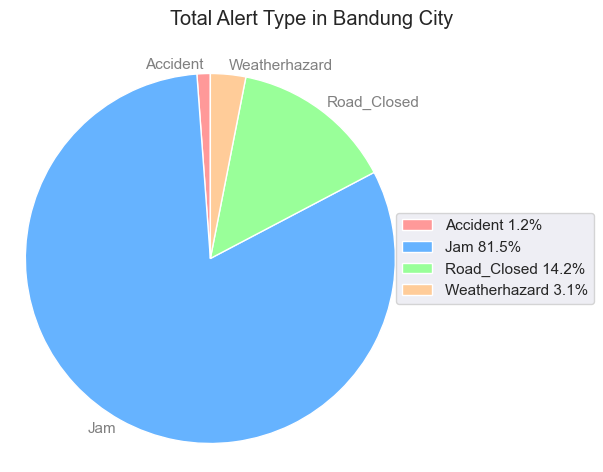

In [3]:
# define df for this analysis
df_alert_type_and_total_records = (
    df[["Alert Type", "Total Alert Records"]]
    .groupby(["Alert Type"], as_index=False)
    .sum()
)

func.plot_pie_chart(
    df_alert_type_and_total_records,
    "Alert Type",
    "Total Alert Records",
    "Total Alert Type in Bandung City",
)


# Top 10 Street in Bandung with Highest Total Alert Records
We will see any city in Bandung which has the highest total alert records for both hours, weathherhazard, accident, and road_closed

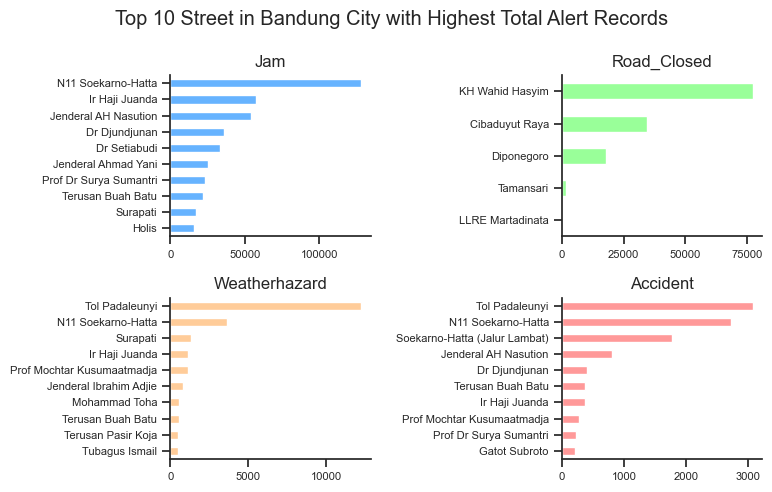

In [4]:
# define data for this analysis
df_street_and_alert_records = (
    df[["Street", "Alert Type", "Total Alert Records"]]
    .groupby(["Street", "Alert Type"], as_index=False)["Total Alert Records"]
    .sum()
)

# top 10 street for highest total report
(
    df_top10_street_jam,
    df_top10_street_accident,
    df_top10_street_roadclosed,
    df_top10_street_weatherhazard,
) = [
    df_street_and_alert_records[df_street_and_alert_records["Alert Type"] == type]
    .sort_values("Total Alert Records", ascending=False)
    .reset_index()
    .head(10)
    for type in ["Jam", "Accident", "Road_Closed", "Weatherhazard"]
]

# set canvas
sns.set_style("ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
fig.suptitle("Top 10 Street in Bandung City with Highest Total Alert Records")

for df_i, ax_pos, title, color in zip(
    [
        df_top10_street_jam,
        df_top10_street_roadclosed,
        df_top10_street_weatherhazard,
        df_top10_street_accident,
    ],
    [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]],
    ["Jam", "Road_Closed", "Weatherhazard", "Accident"],
    ["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"],
):
    func.plot_barh(df_i, "Street", "Total Alert Records", ax_pos, "", "", title, color)
    ax_pos.spines[["right", "top"]].set_visible(False)

plt.tight_layout()
plt.show()


# Alert Records Trend in Bandung City
We will see the trend alert records from each alert type in the city of Bandung from July to September 2022.

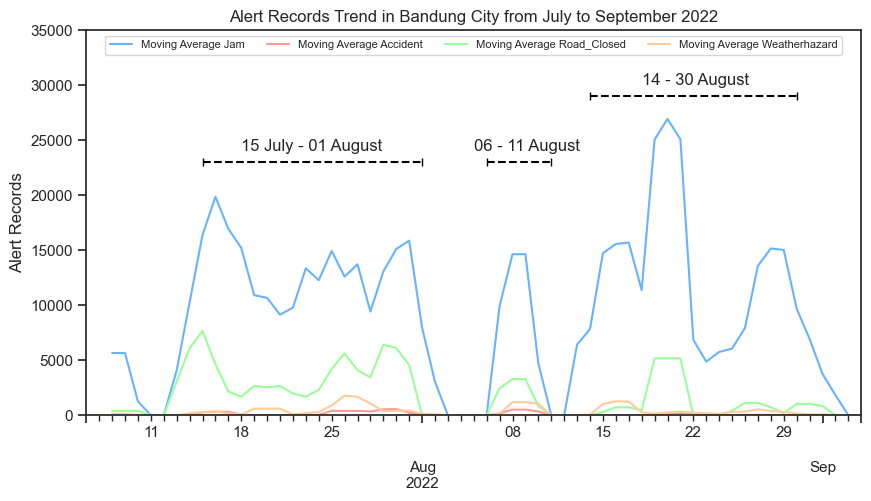

In [5]:
# create data for this analysis
df["Datetime"] = df["Datetime"].apply(pd.to_datetime)
df_time_series = df.copy()
df_time_series["New Datetime"] = df_time_series["Datetime"].dt.strftime("%d-%m-%Y")
df_time_series["New Datetime"] = df_time_series["New Datetime"].apply(pd.to_datetime)

# select for each alert type
df_time_series = df_time_series[["New Datetime", "Alert Type", "Total Alert Records"]]
(
    df_jam_time_series,
    df_roadclosed_time_series,
    df_accident_time_series,
    df_weatherhazard_time_series,
) = [
    df_time_series[df_time_series["Alert Type"] == x]
    for x in ["Jam", "Road_Closed", "Accident", "Weatherhazard"]
]

# groupby based on new datetime column
df_jam_time_series = df_jam_time_series.groupby(["New Datetime"], as_index=True).sum()
df_roadclosed_time_series = df_roadclosed_time_series.groupby(
    ["New Datetime"], as_index=True
).sum()
df_accident_time_series = df_accident_time_series.groupby(
    ["New Datetime"], as_index=True
).sum()
df_weatherhazard_time_series = df_weatherhazard_time_series.groupby(
    ["New Datetime"], as_index=True
).sum()

# select only relevant columns
df_time_series = df_time_series[["New Datetime", "Total Alert Records"]]

# sort dfs based on the date
df_jam_time_series.sort_values("New Datetime", inplace=True)
df_accident_time_series.sort_values("New Datetime", inplace=True)
df_roadclosed_time_series.sort_values("New Datetime", inplace=True)
df_weatherhazard_time_series.sort_values("New Datetime", inplace=True)

# filling the empty dates
full_dates = pd.date_range(
    datetime.datetime.strptime("2022-07-06", "%Y-%m-%d"),
    datetime.datetime.strptime("2022-09-04", "%Y-%m-%d"),
)

df_jam_time_series = df_jam_time_series.reindex(full_dates, fill_value=0)
df_accident_time_series = df_accident_time_series.reindex(full_dates, fill_value=0)
df_weatherhazard_time_series = df_weatherhazard_time_series.reindex(
    full_dates, fill_value=0
)
df_roadclosed_time_series = df_roadclosed_time_series.reindex(full_dates, fill_value=0)

# create column for moving average
df_jam_time_series["Moving Average Jam"] = (
    df_jam_time_series["Total Alert Records"].rolling(3).mean()
)
df_roadclosed_time_series["Moving Average Road_Closed"] = (
    df_roadclosed_time_series["Total Alert Records"].rolling(3).mean()
)
df_weatherhazard_time_series["Moving Average Weatherhazard"] = (
    df_weatherhazard_time_series["Total Alert Records"].rolling(3).mean()
)
df_accident_time_series["Moving Average Accident"] = (
    df_accident_time_series["Total Alert Records"].rolling(3).mean()
)

# set canvas
sns.set_style("ticks")
# plot
a = df_jam_time_series["Moving Average Jam"].plot(
    figsize=(10, 5), legend=True, color="#66b3ff"
)
df_accident_time_series["Moving Average Accident"].plot(legend=True, color="#ff9999")
df_roadclosed_time_series["Moving Average Road_Closed"].plot(
    legend=True, color="#99ff99"
)
df_weatherhazard_time_series["Moving Average Weatherhazard"].plot(
    legend=True, color="#ffcc99"
)
# config plot
a.set_ylim([0, 35000])
plt.legend(ncol=4, loc="upper center", fontsize=8)

# draw marker
plt.plot(
    datetime.datetime.strptime("2022-07-15", "%Y-%m-%d"),
    23000,
    datetime.datetime.strptime("2022-08-01", "%Y-%m-%d"),
    23000,
    marker="|",
    color="black",
)
plt.plot(
    datetime.datetime.strptime("2022-08-06", "%Y-%m-%d"),
    23000,
    datetime.datetime.strptime("2022-08-11", "%Y-%m-%d"),
    23000,
    marker="|",
    color="black",
)
plt.plot(
    datetime.datetime.strptime("2022-08-14", "%Y-%m-%d"),
    29000,
    datetime.datetime.strptime("2022-08-30", "%Y-%m-%d"),
    29000,
    marker="|",
    color="black",
)

# draw lines
plt.hlines(
    xmin=datetime.datetime.strptime("2022-07-15", "%Y-%m-%d"),
    xmax=datetime.datetime.strptime("2022-08-01", "%Y-%m-%d"),
    y=23000,
    color="black",
    linestyles="dashed",
)
plt.hlines(
    xmin=datetime.datetime.strptime("2022-08-06", "%Y-%m-%d"),
    xmax=datetime.datetime.strptime("2022-08-11", "%Y-%m-%d"),
    y=23000,
    color="black",
    linestyles="dashed",
)
plt.hlines(
    xmin=datetime.datetime.strptime("2022-08-14", "%Y-%m-%d"),
    xmax=datetime.datetime.strptime("2022-08-30", "%Y-%m-%d"),
    y=29000,
    color="black",
    linestyles="dashed",
)

# annotate
plt.annotate(
    "15 July - 01 August", (datetime.datetime.strptime("2022-07-18", "%Y-%m-%d"), 24000)
)
plt.annotate(
    "06 - 11 August", (datetime.datetime.strptime("2022-08-05", "%Y-%m-%d"), 24000)
)
plt.annotate(
    "14 - 30 August", (datetime.datetime.strptime("2022-08-18", "%Y-%m-%d"), 30000)
)

plt.ylabel("Alert Records")
plt.title("Alert Records Trend in Bandung City from July to September 2022")
plt.show()


# Jam Level based on Day of The Week and Hour
We are going to see Jam Level based on day and hour.

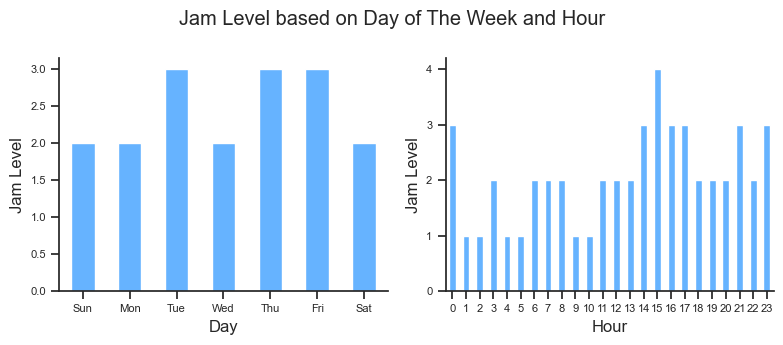

In [6]:
# define data for this analysis
df_datetime_and_jam_level = (
    df[["Datetime", "Jam Level"]]
    .groupby(["Datetime"])["Jam Level"]
    .apply(lambda x: x.value_counts().index[0])
    .reset_index()
)

# configure data jam level based on day of the week and hour
df_datetime_and_jam_level["Day"] = df_datetime_and_jam_level["Datetime"].dt.weekday
df_datetime_and_jam_level["Hour"] = df_datetime_and_jam_level["Datetime"].dt.hour

# data jam level based on day of the week
df_day_and_jam_level, df_hour_and_jam_level = [
    df_datetime_and_jam_level[[col, "Jam Level"]]
    .groupby([col])["Jam Level"]
    .apply(lambda x: x.value_counts().index[0])
    .reset_index()
    for col in ["Day", "Hour"]
]

# remap day value to name of the day
day_dict = {
    0: "Sun",
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat",
}
df_day_and_jam_level = df_day_and_jam_level.replace({"Day": day_dict})

# set canvas
sns.set_style("ticks")
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5))
fig.suptitle("Jam Level based on Day of The Week and Hour")

func.plot_bar(
    df_day_and_jam_level, "Day", "Jam Level", axs[0], "Day", "Jam Level", "", "#66b3ff"
)
func.plot_bar(
    df_hour_and_jam_level,
    "Hour",
    "Jam Level",
    axs[1],
    "Hour",
    "Jam Level",
    "",
    "#66b3ff",
)

axs[0].spines[["right", "top"]].set_visible(False)
axs[1].spines[["right", "top"]].set_visible(False)

plt.tight_layout()
plt.show()
